# Automatic-Crypto-Website-API-Pull

import nessary libraries

In [101]:

import requests 
from requests.exceptions import ConnectionError,Timeout,TooManyRedirects
import json
import pandas as pd

Requesting all the data from the crypto website via API

In [112]:

#setting API url for retrieving the latest cryptocurrency listings
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '54ff4889-f067-439f-862d-2c0b05fbdae2',
}

#Allows for persisting certain parameters across multiple requests
session = requests.Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  # print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [113]:
#Display maximum number of columns in the dataframe

pd.set_option('display.max_columns',None)

In [117]:
#Normalizing from semi-structure to flat table as dataframe

df=pd.json_normalize(data['data'])
df['timestamp']=pd.Timestamp.now()     #introducing new column to showcase exeuting time

In [115]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10200,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19365437.00000,19365437,False,NaN,1,NaN,NaN,NaN,2023-05-06T09:18:00.000Z,29323.03654,17275150084.86326,3.36630,0.08785,0.90874,0.11422,4.77927,30.80484,25.24390,567853416706.45776,47.14590,615783767277.53003,NaN,2023-05-06T09:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-06 14:49:56.640674
1,1027,Ethereum,ETH,ethereum,6835,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120357218.70643,120357218.70643,False,NaN,2,NaN,NaN,NaN,2023-05-06T09:18:00.000Z,1940.72495,10573835685.38169,56.15910,-0.00363,2.29135,2.10291,3.11873,23.62748,16.08802,233580257701.92963,19.39290,233580257701.92999,NaN,2023-05-06T09:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-06 14:49:56.640674
2,825,Tether,USDT,tether,52650,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,82078431886.15607,85090638896.26192,False,NaN,3,NaN,NaN,NaN,2023-05-06T09:18:00.000Z,1.00123,30755166155.19881,30.38240,0.00098,0.07636,0.05196,0.11499,0.12147,0.10253,82178979871.40860,6.82290,85194876905.06000,NaN,2023-05-06T09:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-06 14:49:56.640674
3,1839,BNB,BNB,bnb,1333,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155861671.48181,155861671.48181,False,NaN,4,NaN,NaN,NaN,2023-05-06T09:18:00.000Z,324.84468,539623706.04635,25.36550,0.04945,0.04568,0.55641,3.91851,13.12857,-3.62678,50630834736.07253,4.20400,50630834736.07000,NaN,2023-05-06T09:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-06 14:49:56.640674
4,3408,USD Coin,USDC,usd-coin,12191,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,30391851704.85699,30391851704.85699,False,NaN,5,NaN,NaN,NaN,2023-05-06T09:18:00.000Z,0.99994,4032593929.35933,26.50620,-0.01665,0.00041,0.00278,0.02996,-0.00317,-0.01401,30389981762.99985,2.52340,30389981763.00000,NaN,2023-05-06T09:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-06 14:49:56.640674


Automated process for making an API request to the CoinMarketCap API

In [118]:
#Automating the data 
import os              #provides functions for interacting with the operating system.

def api_runner():

    global df             #to run df otside we want to define it as global scope
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'5000',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '54ff4889-f067-439f-862d-2c0b05fbdae2',
    }

    session = requests.Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
    
    df=pd.json_normalize(data['data'])
    df['timestamp']=pd.Timestamp.now()
    df

    #Writing data into the csv from dataframe 
    
    if not os.path.isfile(r"C:/Users/tuanminhaj/Data-Analyst-Projects/Automating-Crypto-Website-API-Pull-Using-Python/python scripts/API.csv"):
        df.to_csv(r"C:/Users/tuanminhaj/Data-Analyst-Projects/Automating-Crypto-Website-API-Pull-Using-Python/python scripts/API.csv",header='column_names')
    else:
        df.to_csv(r'C:/Users/tuanminhaj/Data-Analyst-Projects/Automating-Crypto-Website-API-Pull-Using-Python/python scripts/API.csv',mode='a',header=False)
        







In [119]:
import os
from time import time
from time import sleep

In [75]:
#This will iterate 100 times per day as gien maximum credits in crypto website. and wait 10 seconds between each iteration

for i in range(100):
    api_runner()
    print("api runner competed successfully")
    sleep(10)
exit()

api runner competed successfully
api runner competed successfully
api runner competed successfully
api runner competed successfully
api runner competed successfully


KeyboardInterrupt: 

In [121]:
#Reading csv
df3=pd.read_csv(r'C:\Users\tuanminhaj\Data-Analyst-Projects\Automating-Crypto-Website-API-Pull-Using-Python\python scripts\API.csv')
df3['timestamp'].head()

0    2023-05-06 13:54:07.259635
1    2023-05-06 13:54:07.259635
2    2023-05-06 13:54:07.259635
3    2023-05-06 13:54:07.259635
4    2023-05-06 13:54:07.259635
Name: timestamp, dtype: object

Transorming Data

In [37]:
#changing the numbers into floats with 5 decimal points

pd.set_option('display.float_format',lambda x:'%.5f'%x)

In [38]:
#groupby data for find variations

df4=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [39]:
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.26480,0.78393,0.10606,5.08787,30.90373,25.46572
Ethereum,-1.13371,2.31584,2.30308,3.54637,23.81677,16.53443
Tether,0.02399,0.05502,0.03827,0.13197,0.12394,0.10071
BNB,-0.30531,-0.00618,0.57517,3.97183,12.99749,-2.52562
USD Coin,0.02104,-0.01611,0.00442,0.04254,0.00497,0.00870
...,...,...,...,...,...,...
BaconDAO,-0.23751,3.08118,9.61652,3.51970,-8.06652,-11.25723
GoldMiner,-0.32869,-4.76304,-15.88703,-16.98326,-26.15449,-45.07169
BlockCDN,-0.70941,5.79538,-15.45930,-23.35979,-4.70047,14.46770


In [40]:
#Visual data as stacking formats

df5=df4.stack()
df5

name                                    
Bitcoin     quote.USD.percent_change_1h     -0.26480
            quote.USD.percent_change_24h     0.78393
            quote.USD.percent_change_7d      0.10606
            quote.USD.percent_change_30d     5.08787
            quote.USD.percent_change_60d    30.90373
                                              ...   
Real Realm  quote.USD.percent_change_24h     0.19121
            quote.USD.percent_change_7d    -13.09311
            quote.USD.percent_change_30d    -9.19002
            quote.USD.percent_change_60d    -6.21469
            quote.USD.percent_change_90d    30.77052
Length: 29874, dtype: float64

In [41]:
df6=df5.to_frame(name='values')
df6

values
name                                             
Bitcoin    quote.USD.percent_change_1h   -0.26480
           quote.USD.percent_change_24h   0.78393
           quote.USD.percent_change_7d    0.10606
           quote.USD.percent_change_30d   5.08787
           quote.USD.percent_change_60d  30.90373
...                                           ...
Real Realm quote.USD.percent_change_24h   0.19121
           quote.USD.percent_change_7d  -13.09311
           quote.USD.percent_change_30d  -9.19002
           quote.USD.percent_change_60d  -6.21469
           quote.USD.percent_change_90d  30.77052

[29874 rows x 1 columns]

In [42]:
df6.count()

values    29874
dtype: int64

In [43]:
# index=pd.Index(range(29874))

df7=df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.26480
1,Bitcoin,quote.USD.percent_change_24h,0.78393
2,Bitcoin,quote.USD.percent_change_7d,0.10606
3,Bitcoin,quote.USD.percent_change_30d,5.08787
4,Bitcoin,quote.USD.percent_change_60d,30.90373
...,...,...,...
29869,Real Realm,quote.USD.percent_change_24h,0.19121
29870,Real Realm,quote.USD.percent_change_7d,-13.09311
29871,Real Realm,quote.USD.percent_change_30d,-9.19002
29872,Real Realm,quote.USD.percent_change_60d,-6.21469


In [64]:
df8=df7.rename(columns={'level_1':'percentage_change'})
df9=df8.head(100)
df9

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.26480
1,Bitcoin,quote.USD.percent_change_24h,0.78393
2,Bitcoin,quote.USD.percent_change_7d,0.10606
3,Bitcoin,quote.USD.percent_change_30d,5.08787
4,Bitcoin,quote.USD.percent_change_60d,30.90373
...,...,...,...
95,Avalanche,quote.USD.percent_change_90d,-19.13737
96,Dai,quote.USD.percent_change_1h,-0.07355
97,Dai,quote.USD.percent_change_24h,-0.05247
98,Dai,quote.USD.percent_change_7d,-0.03203


Visualizing Data

In [65]:
#importing libraries for visualizing

import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
#rename x axis for better reading

df9['percentage_change']=df9['percentage_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

C:\Users\tuanminhaj\AppData\Local\Temp\ipykernel_13536\81847576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['percentage_change']=df9['percentage_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])


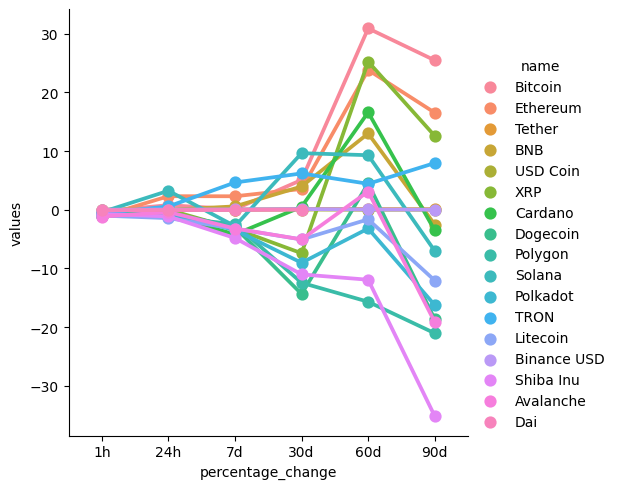

In [67]:
#visualizing slized data for demonstration

sns.catplot(x='percentage_change',y='values',hue='name',data=df9,kind='point')

In [85]:
# df.columns
df10=df3[['name','quote.USD.price','timestamp']]
df10

,name,quote.USD.price,timestamp
0,Bitcoin,29300.60377,2023-05-06 13:54:07.259635
1,Ethereum,1941.76935,2023-05-06 13:54:07.259635
2,Tether,1.00107,2023-05-06 13:54:07.259635
3,BNB,324.75441,2023-05-06 13:54:07.259635
4,USD Coin,0.99999,2023-05-06 13:54:07.259635
...,...,...,...
24995,BaconDAO,0.00037,2023-05-06 14:04:34.813418
24996,GoldMiner,0.00000,2023-05-06 14:04:34.813418
24997,BlockCDN,0.00037,2023-05-06 14:04:34.813418
24998,Kyberdyne,0.00182,2023-05-06 14:04:34.813418


In [86]:
df10

,name,quote.USD.price,timestamp
0,Bitcoin,29300.60377,2023-05-06 13:54:07.259635
1,Ethereum,1941.76935,2023-05-06 13:54:07.259635
2,Tether,1.00107,2023-05-06 13:54:07.259635
3,BNB,324.75441,2023-05-06 13:54:07.259635
4,USD Coin,0.99999,2023-05-06 13:54:07.259635
...,...,...,...
24995,BaconDAO,0.00037,2023-05-06 14:04:34.813418
24996,GoldMiner,0.00000,2023-05-06 14:04:34.813418
24997,BlockCDN,0.00037,2023-05-06 14:04:34.813418
24998,Kyberdyne,0.00182,2023-05-06 14:04:34.813418


In [92]:
#filtering only bitcoin variation in short timestamp

df11=df10[df10['name']=='Bitcoin']
df11

,name,quote.USD.price,timestamp
0,Bitcoin,29300.60377,2023-05-06 13:54:07.259635
5000,Bitcoin,29351.08390,2023-05-06 14:03:59.012753
10000,Bitcoin,29351.08390,2023-05-06 14:04:11.246597
15000,Bitcoin,29351.08390,2023-05-06 14:04:22.999091
20000,Bitcoin,29351.08390,2023-05-06 14:04:34.813418


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

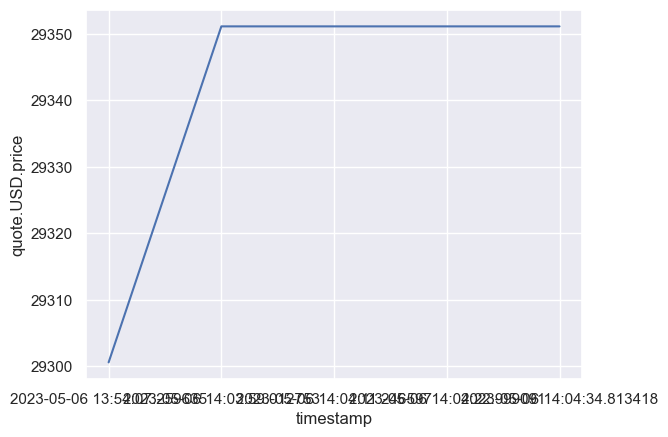

In [93]:
#plotting bitcoin variations vs USD_price

sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp',y='quote.USD.price',data=df11)